In [1]:
import numpy as np

# sigmoid function to normalize inputs
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# sigmoid derivatives to adjust synaptic weights
def sigmoid_derivative(x):
    return x * (1 - x)

# input dataset
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])

# output dataset
training_outputs = np.array([[0,1,1,0]]).T

# seed random numbers to make calculation
np.random.seed(1)

# initialize weights randomly with mean 0 to create weight matrix, synaptic weights
synaptic_weights = 2 * np.random.random((3,1)) - 1

print('Random starting synaptic weights: ')
print(synaptic_weights)

# Iterate 10,000 times
for iteration in range(10000):

    # Define input layer
    input_layer = training_inputs
    # Normalize the product of the input layer with the synaptic weights
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))

    # how much did we miss?
    error = training_outputs - outputs

    # multiply how much we missed by the
    # slope of the sigmoid at the values in outputs
    adjustments = error * sigmoid_derivative(outputs)

    # update weights
    synaptic_weights += np.dot(input_layer.T, adjustments)

print('Synaptic weights after training: ')
print(synaptic_weights)

print("Output After Training:")
print(outputs)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Output After Training:
[[0.00966449]
 [0.99211957]
 [0.99358898]
 [0.00786506]]


Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Synaptic weights after training: 
[[ 6.50357435]
 [-0.21880365]
 [-3.03408492]]
Output After Training:
[[0.04595881]
 [0.96265786]
 [0.96977471]
 [0.03726332]]
Number of Iterations when Error is less than 0.1: 
302


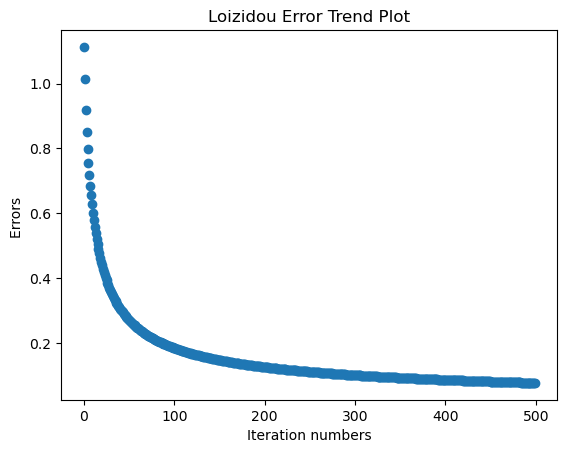

In [22]:
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])

training_outputs = np.array([[0,1,1,0]]).T

np.random.seed(1)
synaptic_weights = 2 * np.random.random((3,1)) - 1

print('Random starting synaptic weights: ')
print(synaptic_weights)

errors = [] 
for iteration in range(500):
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))
    
    #vector representing the difference between the expected outputs (a) and the actual outputs (b) 
    # Euclidean norm = sqrt(a^2 + b^2)
    error = training_outputs - outputs   
    # Calculate and store the Euclidean norm of the error
    error_euclidean = np.sqrt(np.sum(error**2))
    errors.append(error_euclidean)
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

print('Synaptic weights after training: ')
print(synaptic_weights)
print("Output After Training:")
print(outputs)
#STEP 2 - PLOT
plt.scatter(range(500), errors)
plt.title("Loizidou Error Trend Plot")
plt.xlabel("Iteration numbers")
plt.ylabel("Errors ")
plt.show


for i in range(1000):
    if (errors[i] < 0.1):
        print("Number of Iterations when Error is less than 0.1: ")
        print(i)
        break